# Highway2Vec Embedder

In [1]:
import geopandas as gpd
from IPython.display import display

## Get an area to embed

<Axes: >

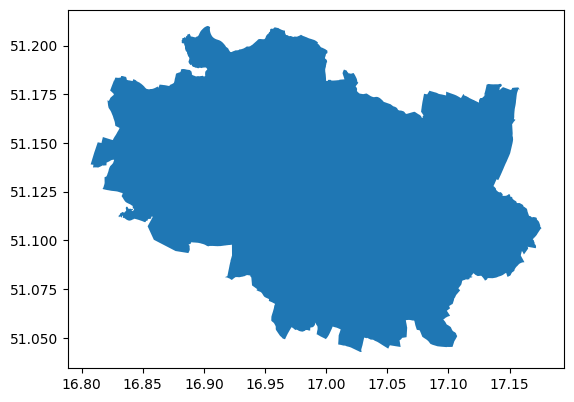

In [2]:
from srai.utils import geocode_to_region_gdf

area_gdf = geocode_to_region_gdf("Wrocław, PL")
area_gdf.plot()

## Regionize the area with a regionizer

3168


,geometry
region_id,
891e204520bffff,"POLYGON ((17.09580 51.06410, 17.09832 51.06333..."
891e2047583ffff,"POLYGON ((17.11136 51.16302, 17.11388 51.16225..."
891e2040d53ffff,"POLYGON ((17.03447 51.11786, 17.03198 51.11694..."


<Axes: >

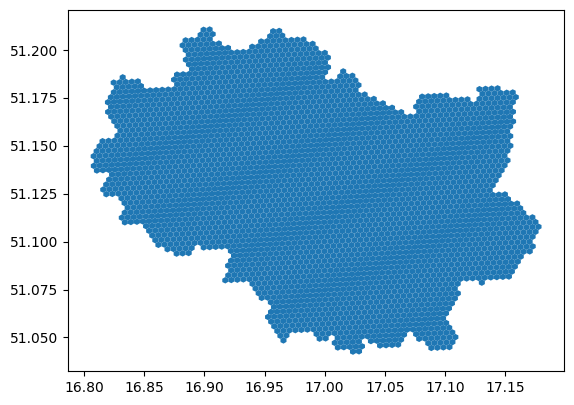

In [3]:
from srai.regionizers import H3Regionizer

regionizer = H3Regionizer(9)
regions_gdf = regionizer.transform(area_gdf)
print(len(regions_gdf))
display(regions_gdf.head(3))
regions_gdf.plot()

## Download a road infrastructure for the area

  0%|          | 0/12 [00:00<?, ?it/s]

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
95584835,51.083111,17.049513,4,NaN,NaN,POINT (17.04951 51.08311)
95584841,51.084699,17.064367,3,NaN,NaN,POINT (17.06437 51.08470)
95584850,51.083328,17.035057,4,NaN,NaN,POINT (17.03506 51.08333)


osmid  \
u        v         key                                      
95584835 297779709 0                [24707867, 656793686]   
         241778108 0                [656794402, 28458110]   
         95584852  0    [301726798, 189513998, 301726791]   

                                        name reversed   length  \
u        v         key                                           
95584835 297779709 0                 Bardzka    False  178.450   
         241778108 0    Aleja Armii Krajowej    False   30.730   
         95584852  0    Aleja Armii Krajowej    False  284.438   

                                                                 geometry  \
u        v         key                                                      
95584835 297779709 0    LINESTRING (17.04951 51.08311, 17.04947 51.083...   
         241778108 0    LINESTRING (17.04951 51.08311, 17.04933 51.083...   
         95584852  0    LINESTRING (17.05357 51.08301, 17.05335 51.082...   

                            from         to  ref  oneway  lanes-1  ...  \
u        v         key                                             ...   
95584835 297779709 0    95584835  297779709  NaN       0        0  ...   
         241778108 0    95584835  241778108   94       0        0  ...   
         95584852  0    95584852   95584835   94       0        0  ...   

                        bicycle-destination  bicycle-official  lit-yes  \
u        v         key                                                   
95584835 297779709 0                      0                 0        1   
         241778108 0                      0                 0        1   
         95584852  0                      0                 0        1   

                        lit-no  lit-sunset-sunrise  lit-24/7  lit-automatic  \
u        v         key                                                        
95584835 297779709 0         0                   0         0              0   
         241778108 0         0                   0         0              0   
         95584852  0         0                   0         0              0   

                        lit-disused  lit-limited  lit-interval  
u        v         key                                          
95584835 297779709 0              0            0             0  
         241778108 0              0            0             0  
         95584852  0              0            0             0  

[3 rows x 226 columns]

<Axes: >

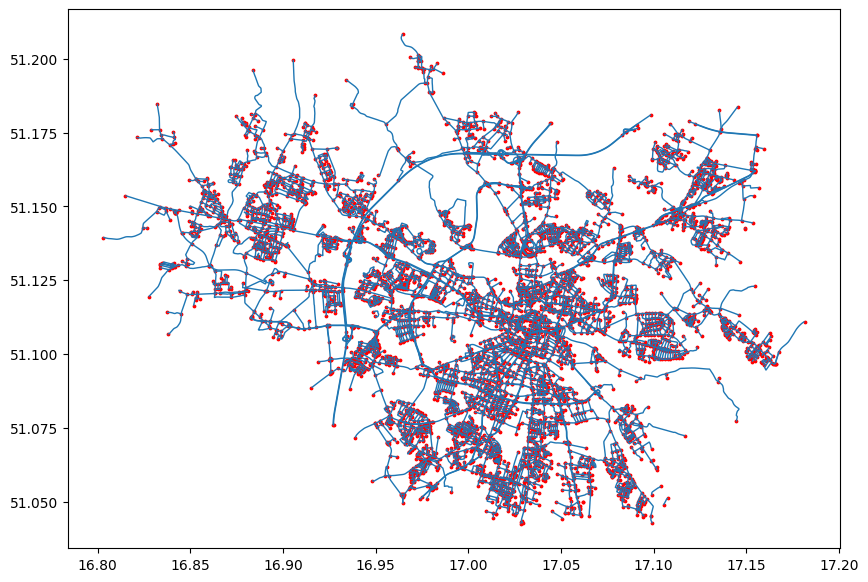

In [4]:
from srai.loaders import OSMWayLoader
from srai.loaders.osm_way_loader import NetworkType

loader = OSMWayLoader(NetworkType.DRIVE)
nodes_gdf, edges_gdf = loader.load(area_gdf)

display(nodes_gdf.head(3))
display(edges_gdf.head(3))

ax = edges_gdf.plot(linewidth=1, figsize=(12, 7))
nodes_gdf.plot(ax=ax, markersize=3, color="red")

## Prepare features

In [5]:
from srai.constants import FEATURES_INDEX

features_gdf = edges_gdf.drop(
    columns=["osmid", "name", "reversed", "length", "from", "to", "ref"]
).reset_index(drop=True)
features_gdf.index.names = [FEATURES_INDEX]
features_gdf.head(3)

,geometry,oneway,lanes-1,lanes-2,lanes-3,lanes-4,lanes-5,lanes-6,lanes-7,lanes-8,...,bicycle-destination,bicycle-official,lit-yes,lit-no,lit-sunset-sunrise,lit-24/7,lit-automatic,lit-disused,lit-limited,lit-interval
feature_id,,,,,,,,,,,,,,,,,,,,,
0,"LINESTRING (17.04951 51.08311, 17.04947 51.083...",0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,"LINESTRING (17.04951 51.08311, 17.04933 51.083...",0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,"LINESTRING (17.05357 51.08301, 17.05335 51.082...",0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Find out which edges correspond to which regions 

In [6]:
from srai.joiners import IntersectionJoiner

joiner = IntersectionJoiner()
joint_gdf = joiner.transform(regions_gdf, features_gdf, return_geom=False)
joint_gdf

Empty DataFrame
Columns: []
Index: [(891e204520bffff, 6274), (891e2045273ffff, 6274), (891e204520bffff, 6275), (891e204520bffff, 4912), (891e20452c7ffff, 4912), (891e204521bffff, 4912), (891e2047583ffff, 5046), (891e2047517ffff, 5046), (891e204758fffff, 5046), (891e2047583ffff, 5375), (891e204759bffff, 5375), (891e2055b6fffff, 5375), (891e2047583ffff, 5049), (891e2047583ffff, 5376), (891e204759bffff, 5376), (891e2047583ffff, 5048), (891e2047593ffff, 5048), (891e2040d53ffff, 2078), (891e2040d5bffff, 2078), (891e2040d53ffff, 865), (891e2040d5bffff, 865), (891e2040d53ffff, 901), (891e2040d53ffff, 900), (891e2040d53ffff, 895), (891e2040d53ffff, 893), (891e2040d53ffff, 874), (891e2040c27ffff, 874), (891e2040d53ffff, 892), (891e2040d53ffff, 891), (891e2040dcbffff, 891), (891e2040d53ffff, 693), (891e2040d53ffff, 894), (891e2040d53ffff, 691), (891e2040d53ffff, 2907), (891e2040dcfffff, 2907), (891e2040d53ffff, 692), (891e2040dcfffff, 692), (891e2040d53ffff, 2908), (891e2040dcfffff, 2908), (891e2040d53ffff, 694), (891e2040dcbffff, 694), (891e2040d53ffff, 690), (891e2040dcbffff, 690), (891e2042167ffff, 7264), (891e2042c0bffff, 7264), (891e2042363ffff, 7264), (891e2042c57ffff, 7264), (891e2042c27ffff, 7264), (891e2042d5bffff, 7264), (891e20423afffff, 7264), (891e204212fffff, 7264), (891e2042c0fffff, 7264), (891e2040433ffff, 7264), (891e2042c23ffff, 7264), (891e2042333ffff, 7264), (891e2042c43ffff, 7264), (891e2042c5bffff, 7264), (891e2042c53ffff, 7264), (891e2042377ffff, 7264), (891e204216fffff, 7264), (891e20404a7ffff, 7264), (891e2042c3bffff, 7264), (891e2042edbffff, 7264), (891e204233bffff, 7264), (891e2042373ffff, 7264), (891e204230fffff, 7264), (891e2042d53ffff, 7264), (891e20404afffff, 7264), (891e2042e93ffff, 7264), (891e204237bffff, 7264), (891e204236bffff, 7264), (891e2042ed3ffff, 7264), (891e2042167ffff, 7317), (891e2042c0bffff, 7317), (891e2042363ffff, 7317), (891e2042c57ffff, 7317), (891e2042c27ffff, 7317), (891e20423afffff, 7317), (891e204212fffff, 7317), (891e20423a7ffff, 7317), (891e2042c0fffff, 7317), (891e2040433ffff, 7317), (891e2042c23ffff, 7317), (891e2042333ffff, 7317), (891e2042c5bffff, 7317), (891e2042c53ffff, 7317), (891e2042377ffff, 7317), (891e204216fffff, 7317), (891e20404a7ffff, 7317), (891e2042c3bffff, 7317), (891e2042edbffff, 7317), (891e204233bffff, 7317), (891e2042373ffff, 7317), (891e204230fffff, 7317), (891e2042d53ffff, 7317), (891e20404afffff, 7317), (891e2042e93ffff, 7317), (891e204237bffff, 7317), (891e204236bffff, 7317), (891e2042ed3ffff, 7317), ...]

[15306 rows x 0 columns]

## Get the embeddings for regions based on the road infrastructure

In [7]:
from srai.embedders import Highway2VecEmbedder
from pytorch_lightning import seed_everything

seed_everything(42)

embedder = Highway2VecEmbedder()
embeddings = embedder.fit_transform(regions_gdf, features_gdf, joint_gdf)
embeddings

Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/calychas/Projects/srai-kedro/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 16.0 K
1 | decoder | Sequential | 16.2 K
---------------------------------------
32.1 K    Tra

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
region_id,,,,,,,,,,,,,,,,,,,,,
891e2040007ffff,-0.609536,-0.137392,0.286215,-0.214329,0.304929,-0.083776,-0.016864,-0.709156,-0.324686,0.585141,...,0.162163,-0.386814,0.048436,0.171572,0.096425,0.126656,0.169974,0.330621,0.310621,0.288743
891e2040013ffff,-0.139452,-0.161599,0.366431,-0.368462,0.530507,-0.062277,-0.030782,-0.733054,-0.496159,0.777603,...,0.289587,-0.773301,0.182694,-0.337687,0.020313,0.222428,0.555915,0.541527,0.268545,0.300727
891e2040017ffff,-0.259704,-0.204234,0.167543,-0.138010,0.160604,-0.129695,0.091464,-0.689499,-0.197364,0.501677,...,0.021392,-0.529101,0.123891,-0.034697,-0.078722,0.159729,0.469902,0.333551,0.159556,0.276420
891e2040023ffff,-0.272599,-0.393879,0.386654,-0.067504,0.480577,-0.124559,0.087754,-0.433953,-0.128980,0.579679,...,0.085510,-0.509543,0.144476,-0.011245,-0.049403,0.327514,0.463133,0.133203,-0.004379,0.417877
891e2040027ffff,-0.623965,-0.313633,0.138276,-0.367084,0.613861,0.122338,-0.005182,-0.695525,-0.325964,0.717707,...,-0.090807,-0.618425,0.143650,-0.163989,-0.022941,0.430154,0.253039,0.229383,0.014906,0.541348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891e2055bc3ffff,-0.573340,-0.077702,0.186096,-0.194918,0.438986,-0.193234,0.069153,-0.808638,-0.312739,0.699394,...,0.383406,-0.586755,-0.010967,-0.246449,-0.272908,0.480663,0.141150,0.491863,0.325582,0.678604
891e2055bc7ffff,-0.398096,0.090607,0.223789,-0.253004,0.750857,-0.380878,0.138340,-0.557038,-0.394415,0.714806,...,0.271348,-0.630666,0.007921,-0.233455,-0.330690,0.497946,0.020112,0.416156,0.256592,0.433672
891e2055bcbffff,-0.766790,-0.166565,0.249523,-0.149514,0.391038,0.018443,0.088594,-1.053355,-0.283016,0.665918,...,0.530554,-0.477843,-0.147052,-0.373077,-0.286987,0.650880,0.227150,0.579994,0.480874,0.887697
